<img src='https://raw.githubusercontent.com/dxkikuchi/SparkSnips/master/dsxbanner.jpg' width='75%'></img>

IBM Data Science Experience is an interactive, collaborative, cloud-based environment where data scientists can use multiple tools to activate their insights.  Data scientists can use the best of open source, tap into IBM's unique features, grow their capabilities, and share their successess.  In addition to all the features in the current preview, many new capabilities are being added including the ability to ingest Object Storage data with a single click, an enhanced user interface for version control, a facility to comment or chat about a notebook with others, and many more!

## New York State Restaurant Inspections Notebook
This notebook will provide insights from official restaurant inspections records for most of the state of New York and provide visualizations of that data.  The location of this data is defined below.  For additional details, please see <a href="https://health.data.ny.gov/Health/Food-Service-Establishment-Last-Inspection/cnih-y5dw" target="_blank">New York State Restaurant Ratings</a>

In [7]:
nyr = 'https://health.data.ny.gov/api/views/cnih-y5dw/rows.csv?accessType=DOWNLOAD'

The csv (comma separated values) data will be read into a Pandas dataframe (nyr) and the first 5 records are displayed using the 'head()' method.<br>
Please attempt to write the code to read the csv data in the following cell without looking at the solution provided 2 cells from here.

In [8]:
import pandas as pd
nyr = pd.read_csv(nyr)
nyr.head()

,FACILITY,ADDRESS,LAST INSPECTED,VIOLATIONS,TOTAL # CRITICAL VIOLATIONS,TOTAL #CRIT. NOT CORRECTED,TOTAL # NONCRITICAL VIOLATIONS,DESCRIPTION,LOCAL HEALTH DEPARTMENT,COUNTY,...,PERMIT EXPIRATION DATE,PERMITTED (D/B/A),PERMITTED CORP. NAME,PERM. OPERATOR LAST NAME,PERM. OPERATOR FIRST NAME,NYS HEALTH OPERATION ID,INSPECTION TYPE,INSPECTION COMMENTS,FOOD SERVICE FACILITY STATE,Location1
0,"SAGAMORE, THE","110 SAGAMORE ROAD, BOLTON LANDING",08/29/2017,Item 2C- Critical Violation [RED] Cooked or ...,1,0,6,Food Service Establishment - Restaurant,Glens Falls District Office,WARREN,...,09/30/2020,NaN,NaN,NaN,NaN,334742,Inspection,All violations must be corrected and are subje...,NY,"(43.557873, -73.64878)"
1,TOWNE DINER LLC,"510 CHEMUNG STREET, WAVERLY",08/29/2017,"Item 8A- Food not protected during storage,...",0,0,7,Food Service Establishment - Restaurant,Tioga County,TIOGA,...,07/31/2018,NaN,JOAN FAIRLIE,FAIRLIE,JOAN,311816,Inspection,NaN,NY,"(42.010617, -76.526414)"
2,NANCY'S FRIED DOUGH (SAHLEN'S STADIU,"460 OAK STREET, ROCHESTER",08/26/2017,Item 2E- Critical Violation [RED] Accurate t...,2,0,1,Food Service Establishment - Restaurant,Monroe County,MONROE,...,12/31/2017,NaN,NaN,NaN,NaN,728297,Inspection,NaN,NY,"(43.161091, -77.626624)"
3,Ri-Dan's,"3755 WEST Main STREET, Batavia",08/23/2017,"Item 14A- Insects, rodents present; Item 14C...",0,0,2,Food Service Establishment - Food Service Esta...,Genesee County,GENESEE,...,06/30/2018,NaN,Ri Dan's Inc.,Saunders,Richard,279028,Inspection,Education provided regarding proper use of 0-2...,NY,"(43.007385, -78.232483)"
4,"TEDDY'S OF ROME, INC.","851 BLACK RIVER BOULEVARD, ROME",08/28/2017,Item 2E- Critical Violation [RED] Accurate t...,2,0,0,Food Service Establishment - Food Service Esta...,Oneida County,ONEIDA,...,12/31/2018,NaN,"TEDDY'S OF ROME, INC.",MORAN,CARLOS,289225,Inspection,Satisfactory.,NY,"(43.220371, -75.446823)"


<b>Solution</b>: Please copy and paste the following code into the previous cell where specified.<br>
nyr = pd.read_csv(nyr)<br>

Ingesting data can be as simple as using one line of code.  Similarly, data can be ingested from Cloudant, DashDB, Object Storage, relational databases, and many others.

The data will be transformed into a Spark dataframe 'nyrDF' and a table will be registered.  Spark dataframes are conceptually equivalent to a table in a relational database or a dataframe in R/Python, but with richer optimizations under the hood.  A table that is registered can be used in subsequent SQL statements.<br>
Please attempt to write the code in the following cell to register the table 'nvrDF' without looking at the solution provided 2 cells from here.

In [9]:
nyrDF = sqlContext.createDataFrame(nyr)
nyrDF.registerTempTable("nyrDF")

<b>Solution</b>: Please copy and paste the following code into the previous cell where specified.<br>
nyrDF.registerTempTable("nyrDF")

Now, a Spark dataframe 'nyvDF' will be created using SQL that will contain the restaurant name (FACILITY), latitude, longitude and violations.  Note that the latitude and longitude are combined in the final column (Location1) of the retrieved data.  They will be extracted separately using regular expressions in the SQL.  The results are ordered by number of violations in descending order and the top 10 are displayed.

In [10]:
query = """
select 
    FACILITY, 
    trim(regexp_extract(location1, '(\\\()(.*),(.*)(\\\))',2)) as lat, 
    trim(regexp_extract(location1, '(\\\()(.*),(.*)(\\\))',3)) as lon,
    cast(`TOTAL # CRITICAL VIOLATIONS` as int) as Violations
from nyrDF 
order by Violations desc
limit 1000
"""
nyvDF = sqlContext.sql(query)
nyvDF.show(10)

+--------------------+---------+----------+----------+
|            FACILITY|      lat|       lon|Violations|
+--------------------+---------+----------+----------+
|MOHAWK VALLEY COM...|43.075939|-75.219801|        14|
|PEPPINOS KITCHEN ...|42.528962|-73.679651|        11|
|CHAMPPS          ...| 43.03186| -77.44292|        11|
|MALTA DINER      ...|42.969989|-73.792906|        10|
|LA FIESTA MEXICAN...| 42.86481|-73.778805|        10|
|LOBSTER POT RESTA...|43.421017| -73.71429|        10|
|CITY TAVERN      ...|43.021289|-77.440138|         9|
|Camp Chateaugay &...|44.767719|-73.982924|         9|
|FLAHERTY'S THREE ...|43.069296|-77.298568|         9|
|HALFMOON DINER   ...|42.837692|-73.743282|         9|
+--------------------+---------+----------+----------+
only showing top 10 rows



Brunel visualization will be used to map the latitude and longitude to a New York state map.  Colors represent the number of violations as described in the key.

In [11]:
import brunel
nyvPan = nyvDF.toPandas()
%brunel map ('NY') + data('nyvPan') x(lon) y(lat) color(Violations) tooltip(FACILITY)

<IPython.core.display.Javascript object>

One of the many key strengths of Data Science Experience is the ability to easily search and quickly learn about various topics.  For example, to find articles, tutorials or notebooks on Brunel, click on the search button on the top right hand corner of this web page.  A side palette will appear where you can enter 'Brunel' or other topics of interest.

Pixiedust provides charting and visualization.  It is an open source Python library that works as an add-on to Jupyter notebooks to improve the user experience of working with data.  Please execute the next cell for a tabular view of the data.


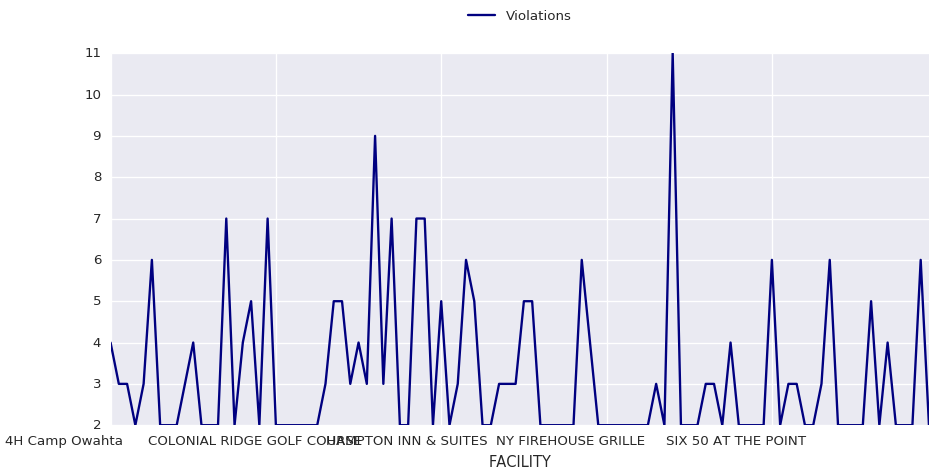

In [12]:
from pixiedust.display import *
display(nyvDF)

If you hover over the lonely lighter colored dot in the middle of the New York State map, you can see that it is for 'CAMP KINGSLEY - CC'.  By starting to type the value 'camp' in the 'Search table' text field above, the record will be displayed.  Numerous visualization are available with support for maps in the future.  Please take a look at the histogram of this data for another insight.  In addition, the data can be downloaded as a file, or stashed to Cloudant or Object Storage.

In just a few notebook cells, data was ingested, manipulated, visualized and yielded insights.  Much more capability, including machine learning, could be leveraged with IBM Data Science Experience.  This is just the tip of the iceberg!